In [557]:
import pandas as pd

dropped_var = ['Player', 'TM', 'GM']

# Read the dataset
afl = pd.read_csv('AFL-2022-totals.csv')

# Replace NaN values with 0
afl.fillna(0, inplace=True)

matches_df = afl['GM']
players = afl['Player']

# Drop qualitative variables
afl = afl.drop(dropped_var, axis=1)

afl

,KI,MK,HB,DI,GL,BH,HO,TK,RB,IF,...,FF,FA,BR,CP,UP,CM,MI,1%,BO,GA
0,344.0,82.0,409.0,753.0,5.0,8.0,0.0,126.0,42.0,124.0,...,36.0,27.0,25.0,409.0,358.0,1.0,1.0,40.0,3.0,19.0
1,346.0,96.0,403.0,749.0,11.0,8.0,0.0,113.0,39.0,110.0,...,44.0,23.0,28.0,400.0,350.0,7.0,7.0,24.0,13.0,14.0
2,342.0,96.0,363.0,705.0,4.0,4.0,0.0,87.0,40.0,121.0,...,32.0,17.0,11.0,267.0,460.0,2.0,3.0,50.0,4.0,18.0
3,354.0,112.0,350.0,704.0,12.0,12.0,0.0,149.0,51.0,104.0,...,35.0,31.0,25.0,217.0,473.0,1.0,5.0,44.0,4.0,11.0
4,357.0,100.0,316.0,673.0,19.0,31.0,0.0,75.0,35.0,156.0,...,16.0,17.0,24.0,305.0,376.0,4.0,19.0,16.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [558]:
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression

target_var = 'BR'

# Set the random seed to produce the same sequence of features to be considered for SelectKBest algorithm
np.random.seed(0)

# Separate the independent variables (features) and the dependent variable (target)
target_df = afl[target_var] 
afl = afl.drop(target_var, axis=1)

# Perform feature selection using SelectKBest with mutual_info_regression scoring
k = 20  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
selected_features = selector.fit_transform(afl, target_df)

# Get the scores of the selected features
feature_scores = selector.scores_

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = afl.columns[selected_feature_indices]

# Print the selected feature names and their scores
sorted_zip = sorted(zip(selected_feature_names, feature_scores[selected_feature_indices]), key=lambda x: -x[1])
MI_features = {}
print("Selected Features and Scores:")
for feature, score in sorted_zip:
    MI_features[feature] = score
    print(f"{feature}: {score}")

Selected Features and Scores:
CG: 0.32971500991377045
CP: 0.3228528348433555
DI: 0.29531091403190235
IF: 0.2897137122408395
KI: 0.2758288440346943
FF: 0.26829945661317467
MK: 0.25782374580319267
CL: 0.23211474665071208
HB: 0.2251480066051137
GA: 0.2010042872579394
UP: 0.19022652004672658
BH: 0.18945810285925724
TK: 0.18451240552245363
FA: 0.1819206095518915
GL: 0.11784952835327012
1%: 0.1012598699806615
BO: 0.07764074030387658
RB: 0.06695211088961539
CM: 0.06678461145476966
MI: 0.06265883583266607


In [559]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value for each feature
correlation_coefficients = {}
for feature in afl.columns:
    coefficient, p_value = pearsonr(afl[feature], target_df)
    correlation_coefficients[feature] = (coefficient, p_value)

# Print the correlation coefficients and p-values
sorted_lst = sorted(correlation_coefficients.items(), key=lambda x: -x[1][0])
PC_features = {}
print("Pearson Correlation Coefficients:")
i = 1
for feature, (coefficient, p_value) in sorted_lst[:20]:
    if p_value < 0.05:
        PC_features[feature] = coefficient
        print(f"{i} {feature}: {coefficient}, p-value: {p_value}")
        i += 1

Pearson Correlation Coefficients:
1 CP: 0.7087758596103373, p-value: 1.9094399591961724e-105
2 IF: 0.6862140792675875, p-value: 2.3821033807290603e-96
3 CL: 0.6842234822917947, p-value: 1.3797445955857896e-95
4 HB: 0.6596375159102723, p-value: 1.2061279704411285e-86
5 DI: 0.6382401843332576, p-value: 1.5961324040438e-79
6 CG: 0.617358448615841, p-value: 4.249953652752714e-73
7 TK: 0.5721356567001548, p-value: 1.0105763871371189e-60
8 UP: 0.5692920452953465, p-value: 5.243151900488327e-60
9 KI: 0.5612756877207199, p-value: 4.991781392228524e-58
10 FF: 0.559723351067318, p-value: 1.1890624756314971e-57
11 GA: 0.5320728543528923, p-value: 2.940259956720383e-51
12 FA: 0.4515016590000937, p-value: 1.1650577282805291e-35
13 BH: 0.4439743846327347, p-value: 2.0993953211496494e-34
14 MK: 0.3975997315300419, p-value: 2.503228623702843e-27
15 GL: 0.3651347251367801, p-value: 5.341562310817749e-23
16 MI: 0.29816087091821786, p-value: 1.6451099400487092e-15
17 BO: 0.18580249542350583, p-value: 9.9

In [560]:
# Find the common keys
common_keys = MI_features.keys() & PC_features.keys()

# Combine the mutual information regression and Pearson correlation scores using a weighted average
alpha = 0.5
scores = [(1 - alpha) * MI_features[i] + alpha * PC_features[i] for i in common_keys]
weighted_scores = sorted(zip(common_keys, scores), key=lambda x: -x[1])
top_features = []
for key, score in weighted_scores[:10]:
    top_features.append(key)
    print(f"{key}: {score}")
    

CP: 0.5158143472268464
IF: 0.4879638957542135
CG: 0.4735367292648057
DI: 0.46677554918257996
CL: 0.4581691144712534
HB: 0.442392761257693
KI: 0.4185522658777071
FF: 0.4140114038402463
UP: 0.37975928267103654
TK: 0.3783240311113042


In [561]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
afl_std = scaler.fit_transform(afl)

# Perform PCA and keep all components
pca = PCA().fit(afl_std)

# Examine the loadings
loadings = abs(pca.components_)

# Rank the features by their contribution to each component
feature_importance = loadings.sum(axis=0)

# Get the indices of the selected features
selected_feature_indices = feature_importance.argsort()[::-1][:10]

# Get the names of the selected features
PCA_features = afl.columns[selected_feature_indices]

In [562]:
i = 1
for feature1, feature2, feature3 in zip(MI_features, PC_features, PCA_features):
    print(f"{i}: {feature1}, {feature2}, {feature3}")
    i += 1

1: CG, CP, HB
2: CP, IF, RB
3: DI, CL, MK
4: IF, HB, CL
5: KI, DI, CM
6: FF, CG, KI
7: MK, TK, IF
8: CL, UP, 1%
9: HB, KI, GL
10: GA, FF, FA


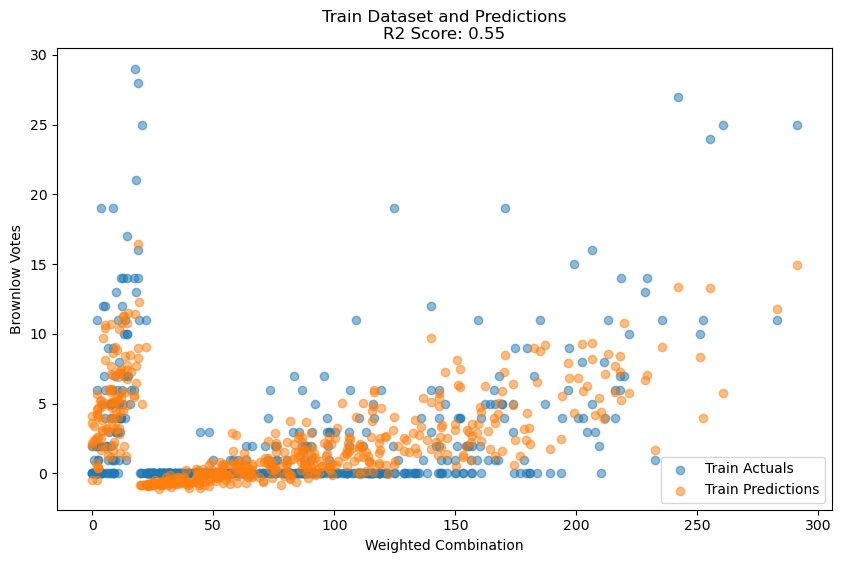

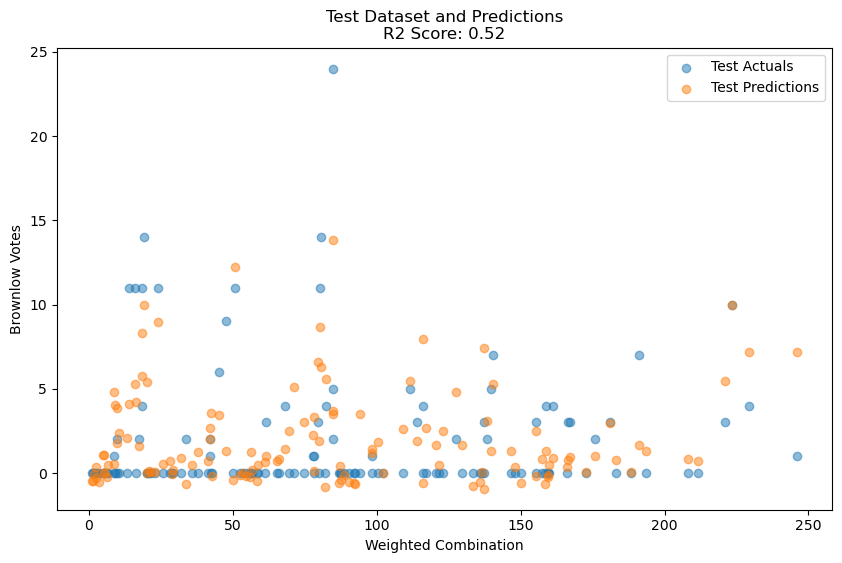

Intercept: -0.6421621411178249
Coefficients: [ 1.49698937e-02  6.50545187e-02 -4.81268240e-02  1.23731362e+12
  2.55851610e-02 -1.23731362e+12 -1.23731362e+12  2.91326672e-02
 -1.16885044e-02 -3.26422825e-02]
MSE: 8.251769441598032
R2: 0.47845390535165433


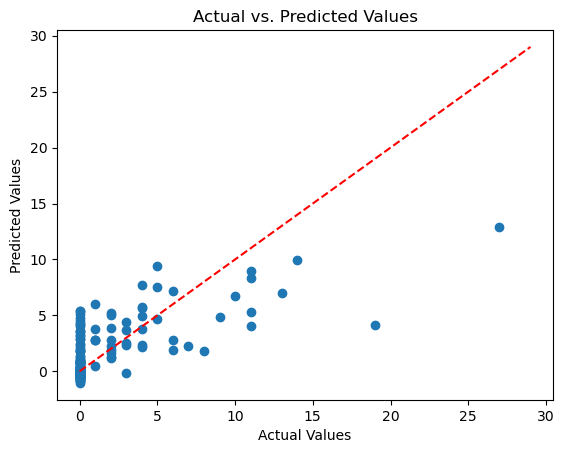

In [564]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

weights = {
    'CP': 0.5158143472268464,
    'IF': 0.4879638957542135,
    'CG': 0.4735367292648057,
    'DI': 0.46677554918257996,
    'CL': 0.4581691144712534,
    'HB': 0.442392761257693,
    'KI': 0.4185522658777071,
    'FF': 0.4140114038402463,
    'UP': 0.37975928267103654,
    'TK': 0.3783240311113042
}

# Rescale the weights to add up to 1
total_weight = sum(weights.values())
weights = {feature: weight / total_weight for feature, weight in weights.items()}

# Compute the weighted combination for each data point
weighted_combination = np.dot(afl[list(weights.keys())], list(weights.values()))

# Define the number of folds
k = 5

# Split the data into k folds for cross-validation
kf = KFold(n_splits=k, random_state=0, shuffle=True)

# Create lists to store the predictions and accuracies
train_preds = []
test_preds = []
train_actuals = []
test_actuals = []
accuracies_train = []
accuracies_test = []

# Iterate over each fold
for train_index, test_index in kf.split(afl[list(weights.keys())]):
    X_train, X_test = afl[list(weights.keys())].iloc[train_index], afl[list(weights.keys())].iloc[test_index]
    y_train, y_test = target_df.iloc[train_index], target_df.iloc[test_index]

    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the training and test data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Append the predictions and actual values to the respective lists
    train_preds.append(train_pred)
    test_preds.append(test_pred)
    train_actuals.append(y_train)
    test_actuals.append(y_test)

    # Calculate and append the accuracies for train and test predictions
    accuracy_train = accuracy_score(y_train, np.round(train_pred))
    accuracy_test = accuracy_score(y_test, np.round(test_pred))
    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)

# Convert the lists of predictions and actual values to arrays
train_preds = np.concatenate(train_preds)
test_preds = np.concatenate(test_preds)
train_actuals = np.concatenate(train_actuals)
test_actuals = np.concatenate(test_actuals)

# Calculate the R2 score for train and test predictions
r2_train = r2_score(train_actuals, train_preds)
r2_test = r2_score(test_actuals, test_preds)

# Plot the train dataset and train predictions against the weighted combination
plt.figure(figsize=(10, 6))
plt.scatter(weighted_combination[train_index], train_actuals[train_index], alpha=0.5, label='Train Actuals')
plt.scatter(weighted_combination[train_index], train_preds[train_index], alpha=0.5, label='Train Predictions')
plt.xlabel('Weighted Combination')
plt.ylabel('Brownlow Votes')
plt.title('Train Dataset and Predictions\nR2 Score: {:.2f}'.format(r2_train))
plt.legend()
plt.show()
# Plot the test dataset and test predictions against the weighted combination
plt.figure(figsize=(10, 6))
plt.scatter(weighted_combination[test_index], test_actuals[test_index], alpha=0.5, label='Test Actuals')
plt.scatter(weighted_combination[test_index], test_preds[test_index], alpha=0.5, label='Test Predictions')
plt.xlabel('Weighted Combination')
plt.ylabel('Brownlow Votes')
plt.title('Test Dataset and Predictions\nR2 Score: {:.2f}'.format(r2_test))
plt.legend()
plt.show()

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# plot the linear regression
plt.scatter(y_test, y_pred) # actual values
plt.plot([min(target_df), max(target_df)], [min(target_df), max(target_df)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))



In [565]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz



# Create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42, max_depth=3)

# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Export the decision tree to a Graphviz file
dot_data = export_graphviz(regressor, out_file=None, filled=True, rounded=True,
                           feature_names=top_features)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("regression_tree", format="png", cleanup=True)  # Save the visualization as a PDF or image file
graph.view()

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 7.628321787090837
Root Mean Squared Error (RMSE): 2.7619416697480843
Coefficient of Determination (R^2): 0.5178583860181585
